# Python Program to predict the diabetes 



### Here we are using naive bayes algorithm for preidction of diabetes among using nine attirbutes values.

#### Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
import seaborn as sns

##### Loading the csv dataset using pandas

In [3]:
data = pd.read_csv("diabetes.csv")

##### Printing the 3 data values that lies at the top and bottom of the dataset. 

In [4]:
print(data.head(3))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  


In [5]:
print(data.tail(3))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  


##### The shape of dataset : No of rows and column

In [6]:
data.shape

(768, 9)

##### Getting the statical measure of the data

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### No of diabetic and non diabetic

In [8]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
data.isnull().values.any()

False

<AxesSubplot:xlabel='Diabetic index', ylabel='No of people'>

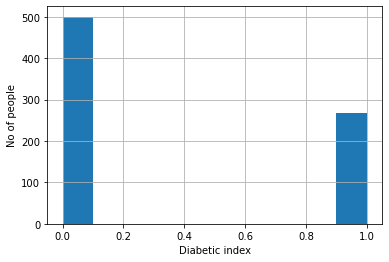

In [10]:
plt.xlabel("Diabetic index")
plt.ylabel("No of people")
data["Outcome"].hist()

In [11]:
# corrmat = data.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# #plotting heatmap
# g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

##### Seperating the data and the labels 

In [12]:
x = data.drop(columns="Outcome", axis=1)
y = data["Outcome"]

In [13]:
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


##### Standardize the data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)

In [16]:
x = standardized_data
y = data["Outcome"]
print(x)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


##### Splitting the data into training testing set

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [18]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_predict = gnb.predict(x_test)
print(y_predict)

[1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


##### Evaluating the model accuracy

In [19]:
acc = accuracy_score(y_test, y_predict) * 100
print(acc, '%')

79.22077922077922 %


In [20]:
print("Classification report")
x = classification_report(y_test,y_predict)
print(x)

Classification report
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



In [21]:
confusion_mtx = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

<function confusion_matrix at 0x7fee62b87430>


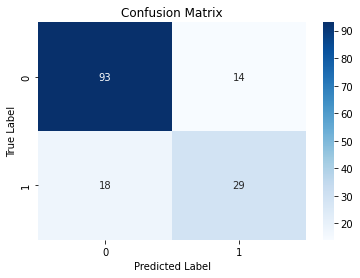

In [22]:
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()